# 27 - Clasificación: Regresión Logística


* En este Notebook vamos a ver como solucionar problemas de ***Clasificación con la Regresión Logística*** y como se implementaría con  la técnica del gradiente descendente.


* Vamos a tratar los siguientes puntos:
<span></span><br>
    1. [Clasificación](#M1)
<span></span><br>
    2. [Regresión Logística](#M2)
<span></span><br>
    3. [Gradiente Descendente: Regresión Logística](#M3)
<span></span><br>
    4. [Pseudocódigo del Gradiente Descendente para la Regresión Logística](#M4)
<span></span><br>
    5. [Implementación: Regresión Logística](#M5)
<span></span><br>
    6. [Ejemplo de Regresión Logística con Iris](#M6)


<hr>


# <a name="M1">1. Clasificación</a>


* ***La Clasificación es un método utilizado para predecir un resultado categórico*** (un valor discreto y finito) ***dadas unas características o atributos que describen al elemento a clasificar***.


* En la clasificación los ***datos de entrada ‘X’ son arbitrarios y la salida ‘Y’ es un conjunto finito*** y generalmente pequeño de N elementos Y={1,2,…,N}


* En función del número de categorías a clasificar tenemos:
<span></span><br><br>
    - ***Clasificación Binaria***: Proceso que consiste en clasificar los elementos en dos categorías Y = {0, 1}
<span></span><br><br>
    - ***Clasificación Múltiple***: Proceso que consiste en clasificar los elementos en mas de dos categorías Y = {0, 1, …, N}
    
    
#### - Ejemplos: Clasificación Binaria

- Email: {Spam, No Spam}
- Tumor: {Maligno, Benigno}
- Transacción Fraudulenta: {Si, No}

<img src="./imgs/26_01_cls.png" style="width: 200px;"/>

#### - Ejemplos: Clasificación Múltiple

- Animales: {Mamíferos, Aves, Reptiles, Peces}
- Pelo: {Moreno, Rubio, Pelirrojo}
- Raza: {Blanco, Negro, Amarillo}

<img src="./imgs/26_02_cls.png" style="width: 200px;"/>


* Los problemas de clasificación se puede resolver de una forma similar a la regresión. El objetivo es del de ***encontrar una “línea” (Decision Boundary) que separe las dos clases a clasificar***:


* A esta "linea" se le conoce como "Decision Boundary" (Decisión de Frontera)


<img src="./imgs/26_03_cls.png" style="width: 400px;"/>


* La decisión de frontera (o Decision Boundary) nos la va a dar una **"Función de Decisión"** del siguiente estilo: 

<span style="font-size:16px">$$Z = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2$$</span>
 

* Por lo que el ***objetivo de la Regresión Logística es encontrar los parámetros $\beta_n$ que minimizen el error cometido por la función de decisión*** a la hora de clasificar.
    
    
* Dada la imagen anterior, el objetivo es clasificar los elementos a partir de la función de decisión:
<span></span><br><br>
<span style="font-size:16px; color:green">$$Verde \rightarrow \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 < 0$$</span>
<span></span><br><br>
<span style="font-size:16px; color:red">$$Rojo \rightarrow \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 \geq 0$$</span>

  

<hr>


# <a name="M2">2. Regresión Logística</a>


* En la clasificación interesa no solo saber a que clase pertenece, si no saber también ***la probabilidad de pertenencia a una clase***.


* Para obtener la “probabilidad” o un valor entre 0 y 1 utilizamos la ***función sigmoidal que transforma un cualquier valor continuo en un valor entre 0 y 1*** (de ahí el nombre de Regresión Logística).

<img src="./imgs/26_04_cls.png" style="width: 500px;"/>


* Por tanto para obtener la probabilidad de que un elemento pertenezca a una clase debemos de aplicar la función sigmoidal:
<span></span><br><br>
<span style="font-size:20px">$$g(Z) = \frac{1}{1 + e^{-Z}} \rightarrow Siendo: Z= \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2$$</span>
    

* La probabilidad de que el elemento pertenezca a la clase 1 es:
<span></span><br><br>
<span style="font-size:16px">$$P(Y=1|X_1,X_2) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2)}}$$</span>


* La probabilidad de que el elemento pertenezca a la clase 0 es:
<span></span><br><br>
<span style="font-size:16px">$$P(Y=0|X_1,X_2) = 1 - \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2)}}$$</span>

    
    
#### Ejemplo: 


<img src="./imgs/26_05_cls.png" style="width: 900px;"/>


* Viendo los resultados sobre una sigmoide, tenemos lo siguiente:


<img src="./imgs/26_06_cls.png" style="width: 900px;"/>

<hr>


# <a name="M3">3. Gradiente Descendente: Regresión Logística</a>


* Con el gradiente descendente podemos encontrar los parámetros $\beta_0$, $\beta_1$, $\beta_2$ (para el caso de clasificación binaria) que mejor ajusten la ***función de decisión*** entre las dos clases:

<span style="font-size:20px">$$Z = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2$$</span>


* Para obtener estos parámetros necesitamos ***definir una función de perdida*** que nos diga cual es nuestro ***error para los datos de entrenamiento*** dados unos valores de $\beta_0$, $\beta_1$, $\beta_2$.


* El error para los problemas de clasificación lo podemos definir como:

<span style="font-size:16px">$$error(x^{(i)},y^{(i)},h(x^{(i)})) \left\{\begin{matrix}
1\;si\;h(x^{(i)})\neq y^{(i)}\\ 
0\;si\;h(x^{(i)})=y^{(i)}
\end{matrix}\right.$$</span>


* Siendo $h(x^{(i)})$ un clasificador binario que devuelve dos valores $[0,1]$


* Pero dado que la ***Regresión Logística*** nos ***devuelve una probabilidad de pertenencia a una clase entre 0 y 1, no podemos tomar ese error para la función de coste*** ya que es un error para un problema discriminante y no para un problema probabilístico.


* Definimos el ***error en la regresión logística*** para un elemento en concreto como:

<span style="font-size:16px">$$error(x^{(i)},y^{(i)},h(x^{(i)})) = \left\{\begin{matrix}
-log(h(x^{(i)}))\;si\;y=1\\ 
-log(1 - h(x^{(i)}))\;si\;y=0
\end{matrix}\right.$$</span>


* Pudiendo simplificar este ***Error*** como:

<span style="font-size:16px">$$error(x^{(i)},y^{(i)},h(x^{(i)})) = -y^{(i)} \cdot log(h(x^{(i)})) - (1 - y^{(i)}) \cdot log(1 - h(x^{(i)}))$$</span>
    
    
* Siendo:

<span style="font-size:16px">$$h(x^{(i)}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2)}}$$</span>


* Definimos la ***Función de Perdida*** como:

<span style="font-size:16px">$$función\;perdida = E(parámetros) = \frac{1}{N} \sum_{i=1}^{N} error(h(x^{(i)}), y^{(i)})$$</span>
    
    
* O lo que es lo mismo

<span style="font-size:16px">$$función\;perdida = E(parámetros) = \frac{-1}{N} \sum_{i=1}^{N} y^{(i)} \cdot log(h(x^{(i)})) + (1 - y^{(i)}) \cdot log(1 - h(x^{(i)}))$$</span>


* Por tanto, el objetivo es el de encontrar los parámetros $\beta_n$ que minimizen la función de perdida:

<span style="font-size:16px">$$\underset{\beta_0, \beta_1, \beta_2}{min} E(\beta_0, \beta_1, \beta_2)  = \frac{-1}{N} \sum_{i=1}^{N} y^{(i)} \cdot log(\frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot X^{(i)}_1 + \beta_2 \cdot X^{(i)}_2)}}) + (1 - y^{(i)}) \cdot log(1 - \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot X^{(i)}_1 + \beta_2 \cdot X^{(i)}_2)}})$$</span>


* La técnica del gradiente descendente consiste en ***derivar de forma parcial la función de perdida para cada uno de los parámetros $\beta_n$ y moverse una determinada cantidad (α) en el sentido contrario a la pendiente de la derivada***, con el objetivo de encontrar los parámetros $\beta_n$ que minimicen la función de perdida:
<span></span><br><br>   
<span style="font-size:16px">$$\beta^{new}_{j} := \beta^{old}_{j} - \alpha  \frac{\partial }{\partial \beta_j}E(\beta_0,...,\beta_j)$$</span>
    
    
* Para ello ***necesitamos tener un modelo (o hipótesis) inicial*** que podemos generar de diferentes maneras (por ejemplo de forma aleatoria) y ***tener unos valores iniciales de $\beta_n$ que vayamos ajustando en función del error cometido***.


* La ***forma de ajustar estos valores $\beta_n$ seria derivando de manera parcial la función de perdida respecto a cada $\beta_n$***, quedando esta actualización de la siguiente forma (NOTA: $\beta_0$ se calcula de manera diferente al resto de $\beta_n$):
<span></span><br><br>   
<span style="font-size:16px">$$\beta_{n}^{new} := \beta_{n}^{old} - \alpha  \frac{1}{N}\sum_{i=1}^{N} ((\frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot X^{(i)}_1 + \beta_2 \cdot X^{(i)}_2)}}) - y^{(i)}) \cdot x_{n}^{(i)}$$</span>
<span></span><br><br> 
<span style="font-size:16px">$$\beta_{0}^{new} := \beta_{0}^{old} - \alpha  \frac{1}{N}\sum_{i=1}^{N} ((\frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot X^{(i)}_1 + \beta_2 \cdot X^{(i)}_2)}}) - y^{(i)})$$</span>
<span></span><br><br>


* Al igual que en la Regresión Lineal, actualizamos los parámetros $\beta_n$ tras recorrer todos los elementos del Dataset; es decir, en cada ***'Epoch'***.


* De la misma manera que en la Regresión Lineal, podemos definir una ***condición de parada*** como por ejemplo:

    - Haber realizado 'N' Epochs
    - El valor de la función de perdida entre una iteración y otra sea el mismo.
    - El valor de la función de perdida entre una iteración y otra tengan una diferencia inferior a un umbral definido.
    - El valor de los parámetros $\beta_n$ entre una iteración y otra tengan una diferencia inferior a un umbral definido.
    - Etc.
    
    
* El hiperparámetro ***$\alpha$*** se conoce como ***'Learning Rate'*** y nos indica la cantidad (α) en el que el gradiente descentente tiene que moverse en el sentido contrario a la pendiente de la derivada. En otras palabras, nos ***indicar 'cuanto' se ajusta el modelo o hipótesis en cada uno de los 'Epochs'***.


* El hiperparámetro ***$\alpha$</span> es un valor "constante" que debe de asignarse previo a la ejecución***. Por simplicidad en este curso lo consideraremos como constante, pero existen técnicas (como el recocido simulado entre otras) que optimizan el valor de $\alpha$ para cada epoch.

<hr>



# <a name="M4">4. Pseudocódigo del Gradiente Descendente para la Regresión Logística</a>


* Los pasos a dar para obtener el modelo (o hipótesis) para un problema de Clasificación con regresión logística sería el siguiente:

    1. Definir valor de $\alpha$
    2. Definir número de Epochs
    3. Definir condición de parada
    4. Generar modelo (o hipótesis) inicial (de manera aleatoria por ejemplo)
    5. Mientras no haya condición de parada ejecutar Epochs:
        - Calculamos los errores y el valor de la función de perdida para el modelo o hipótesis 'old'
        - Generamos nuevo modelo o hipótesis 'new' actualizando los parámetros $\beta_n$
        
        
* Pseudocódigo:


```python
alpha = 0.01
num_epochs = 100
condicion_parada = False

# inicializamos modelo
betas_new = random_list(n)
beta_new_0 = random()

it_counter = 0
while not condicion_parada and it_counter < num_epochs:
    
    # Reasignamos las betas
    betas_old = betas_new
    beta_old_0 = beta_new_0
    
    # Inicializamos errores a cero
    funcion_perdida = 0
    sum_betas = 0
    sum_beta_0 = 0
    
    # Recorremos el Dataset para calcular los errores
    for x, y in dataset:
        Z = beta_0 + x1 * betas_old_1 + x2 * betas_old_1
        hipotesis_i = 1 / (1 + exp(-Z))
        error_i = hipotesis_i - y
        funcion_perdida += (-y * log(hipotesis_i)) - ((1 - y) * log(1 - hipotesis_i))
        for j in betas_old:
            sum_betas[j] += error_i * x[j]
        sum_beta_0 += error_i
    
    # Actualizamos los valores de las betas
    for j in betas_old:
        betas_new[j] = betas_old[j] - (alpha * 1/len(dataset) * sum_betas[j])
    beta_new_0 = beta_old_0 - (alpha * 1/len(dataset) * sum_beta_0)
    
    # Calculamos el valor de la función de perdida del epoch
    funcion_perdida = funcion_perdida / len(dataset)
    
    it_counter+= 1
```

<hr>


# <a name="M5">5. Implementación: Regresión Logística</a>


* En el siguiente fragmento de código está implementado la ***Regresión Logística con el gradiente descendente***, siguiendo el Pseudocódigo mostrado anteriormente junto con alguna lógica programática adicional.



In [1]:
import math
import random
import pandas as pd


def print_iteration_status(epoch, betas, beta_0, funcion_perdida):
    """
    Función que imprime por pantalla el resultado del epoch:
        - epoch: número del epoch.
        - betas: Parámetros de las variables independientes
        - beta_0: parámetro 2.
        - funcion_perdida: Valor de la función de perdida.
    """
    print('\nEpoch {}'.format(epoch))
    print('\tZ =  {:0.4f} + {:0.4f} X1 + {:0.4f} X2 '.format(beta_0, betas[0], betas[1]))
    print('\tg(Z) =  1 / 1 + e^-({:0.4f} + {:0.4f} X1 + {:0.4f} X2)'.format(beta_0, betas[0], betas[1]))
    print('\tFunción de Perdida = {:0.4f}'.format(funcion_perdida))


def is_convergence(new_betas, old_betas, beta_0_new, beta_0_old, tolerance):
    """
    Función que recibe como argumentos los parámetros antiguos y nuevos de la regresión
    y compara los valores para ver si estan por debajo de un umbral y activar la condición
    de parada.
        - new_params: nuevo valores de los parámetros beta
        - old_params: antiguos valores de los parámetros beta
        - b_new: nuevo valor del parámetro beta_0
        - b_old: antiguo valor del parámetro beta_0
        - tolerance: Valor de tolerancia
    """
    convergence = True
    for i in range(len(new_betas)):
        if math.fabs(new_betas[i] - old_betas[i]) >= tolerance:
            convergence = False
            break

    return convergence and math.fabs(beta_0_new - beta_0_old) < tolerance


def logistic_regression(X, y, alpha, num_epochs, tolerance, verbose=False):
    """
    Función que devuelve el modelo o hipótesis de la regresión y los errores por epoch, recibiendo como parámetros:
        - X: Valores de la variable independiente.
        - y: Valores de la variable dependiente.
        - alpha: Learning Rate.
        - num_epochs: Número máximo de epochs.
        - tolerance: Valor de tolerancia de los parámetros para la condición de parada.
        - verbose: Boolean para indicar si queremos imprimir por pantalla el estado del epoch.
    """

    # Inicializamos los parámetros
    random.seed(22)
    new_betas = [random.uniform(-5, 5) for i in range(len(X[0]))]
    old_betas = [random.uniform(-5, 5) for i in range(len(X[0]))]
    beta_0_new, beta_0_old = (random.uniform(-1, 1), random.uniform(-1, 1))

    # Contador de Eposchs
    it_counter = 0

    # Guardamos en una lista el valor de la función de perdida en cada epoch
    errores = []

    # Epochs
    while not is_convergence(new_betas, old_betas, beta_0_new, beta_0_old, tolerance) and it_counter < num_epochs:

        # Reasignamos los valores de los parámetros del epoch anterior
        old_betas = new_betas
        beta_0_old = beta_0_new

        # Inicializamos a cero la función de perdida para cada parámetro
        funcion_perdida = 0
        sum_betas = [0 for i in new_betas]
        sum_beta_0 = 0

        # Recorremos el Dataset para ver los errores cometidos
        for index, elem in enumerate(X):
            ecuation = sum(i * j for i, j in zip(old_betas, elem)) + beta_0_old  # Resultado de la ecuación
            hipotesis = 1 / (1 + math.exp(-1 * ecuation))                        # Resultado del modelo
            error = hipotesis - y[index]                                         # Error cometido en la predicción
            funcion_perdida += (y[index] * math.log(hipotesis)) + \
                               ((1 - y[index]) * math.log(1 - hipotesis))        # Acumulamos el valor de la función de perdida
            for index2, elem2 in enumerate(sum_betas):                           # Acumulado del error por el valor de X para cada beta
                sum_betas[index2] += error * X[index][index2]
            sum_beta_0 += error                                                  # Acumulado del error (para cálculo de beta_0)

        # Actualizamos Parámetros
        for index, elem in enumerate(new_betas):
            new_betas[index] = old_betas[index] - ((alpha / len(X)) * sum_betas[index])
        beta_0_new = beta_0_old - ((alpha / len(X)) * sum_beta_0)

        # Calculamos el error con la función de perdida
        funcion_perdida = (-1 * funcion_perdida) / len(X)
        errores.append(funcion_perdida)

        # Incrementamos contador de Epochs
        it_counter += 1

        # Imprimimos el estado de la interacción
        if verbose:
            print_iteration_status(it_counter, new_betas, beta_0_new, funcion_perdida)

    return new_betas, beta_0_new, errores

<hr>


# <a name="M6">6. Ejemplo de Regresión Logística con Iris</a>

* Dado un ***conjunto de datos*** que tiene los ***tamaños del sépalo de dos tipos de flores***, se pretende obtener una expresión que devuelva la ***probabilidad de que una flor*** (conociendo el tamaño del sépalo) pertenezca a cada clase:
<span></span><br><br>
    <span style="font-size:16px">$P(Y=1|X_1,X_2) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2)}}$</span>
<span></span><br><br>
    <span style="font-size:16px">$P(Y=0|X_1,X_2) = 1 - \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2)}}$</span>
    
    
* Siendo:
    - ***X<sub>1</sub>***: El "largo" del Sepalo
    - ***X<sub>2</sub>***: El "ancho" del Sepalo
    


* Veamos a continuación el conjunto de datos:

In [2]:
df = pd.read_csv("./data/iris/iris_2_categorias.csv")
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
51,6.4,3.2,4.5,1.5,Iris-versicolor
35,5.0,3.2,1.2,0.2,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor
13,4.3,3.0,1.1,0.1,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor


* Aunque tenemos más variables, para este ejemplo nos vamos a quedar con:
    - ***class***: Clase de la flor (Iris-versicolor, Iris-setosa)
    - ***sepal_length***: El "largo" del Sepalo
    - ***sepal_width***: El "ancho" del Sepalo
    
    
* A continuación podemos ver la relación entre las dos variables:

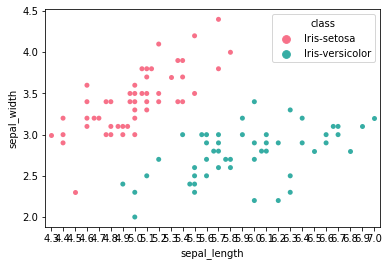

In [3]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.swarmplot(x="sepal_length", y="sepal_width", hue="class", data = df, palette="husl")

## - Transformación de Datos


* Los algoritmos de aprendizaje como la Regresión Logística solo "entienden de números" ya que realiza operaciones matemáticas sobre las variables.


* En los problemas de clasificación es común que las clases que tengamos en nuestro dataset no sean números si no etiquetas (p.e -> {hombre, mujer}, {mamifero, ave, reptil, pez}, etc).


* Por tanto ***tenemos que transformar estas etiquétas en números***. El problema de clasificación que vamos a abordar, tenemos dos clases y le asignaremos los siguientes números:

    - ***0***: Iris-Setosa
    - ***1***: Iris-Versicolor
    
    
* Para realizar estos tipos de transformaciones, ***Scikit nos proporciona una serie de clases que implementan la interfaz "Transformers"*** y que define los métodos ***"transform()"*** y ***"fit_transform()"*** para realizar las transformaciones necesarias.


* Para este caso vamos ha hacer uso de la clase ***LabelEncoder()*** para transformar las etiquetas de las clases.


* A continuación procedemos a pasar los datos un array y a realizar las transformaciones:


In [4]:
from sklearn import preprocessing

X = df[['sepal_length', 'sepal_width']].values   # Obtengo el alto y ancho del sepalo
y_labels = df['class'].values                    # Obtengo las etiquetas


le = preprocessing.LabelEncoder()     # Instancio un objeto de la clase LabelEncoder()
y = le.fit_transform(y_labels)        # Transformo las etiquetas a números

## - Ajuste del Modelo

* A continuación vamos a ajustar el modelo que nos proporcionará la regresión logística.


* Para ello vamos ha hacer uso de la implementación de la regresión logística con el gradiente descendente, pasándole los siguientes parámetros:

    - X: Tamaño de las flores
    - y: Tipo de flor
    - Learning Rate: 0.2
    - num_epochs: 50
    - tolerancia sobre los parámetros: 0.001
    - Verbose: True para ver la evolución

In [5]:
betas, beta_0, funcion_perdida = logistic_regression(X=X, y=y, alpha=0.2, num_epochs=50, tolerance=0.001, verbose=True)


Epoch 1
	Z =  -0.7315 + 4.0815 X1 + -3.9381 X2 
	g(Z) =  1 / 1 + e^-(-0.7315 + 4.0815 X1 + -3.9381 X2)
	Función de Perdida = 5.0072

Epoch 2
	Z =  -0.8312 + 3.5825 X1 + -4.2787 X2 
	g(Z) =  1 / 1 + e^-(-0.8312 + 3.5825 X1 + -4.2787 X2)
	Función de Perdida = 3.1218

Epoch 3
	Z =  -0.9200 + 3.1380 X1 + -4.5800 X2 
	g(Z) =  1 / 1 + e^-(-0.9200 + 3.1380 X1 + -4.5800 X2)
	Función de Perdida = 1.3023

Epoch 4
	Z =  -0.9518 + 2.9805 X1 + -4.6839 X2 
	g(Z) =  1 / 1 + e^-(-0.9518 + 2.9805 X1 + -4.6839 X2)
	Función de Perdida = 0.2480

Epoch 5
	Z =  -0.9631 + 2.9282 X1 + -4.7208 X2 
	g(Z) =  1 / 1 + e^-(-0.9631 + 2.9282 X1 + -4.7208 X2)
	Función de Perdida = 0.1277

Epoch 6
	Z =  -0.9684 + 2.9076 X1 + -4.7386 X2 
	g(Z) =  1 / 1 + e^-(-0.9684 + 2.9076 X1 + -4.7386 X2)
	Función de Perdida = 0.1127

Epoch 7
	Z =  -0.9712 + 2.9002 X1 + -4.7487 X2 
	g(Z) =  1 / 1 + e^-(-0.9712 + 2.9002 X1 + -4.7487 X2)
	Función de Perdida = 0.1099

Epoch 8
	Z =  -0.9729 + 2.8985 X1 + -4.7555 X2 
	g(Z) =  1 / 1 + e^-

## - Evolución de la función del perdida por epoch


* Podemos observar tambien como evoluciona la función de perdida por epoch, viendo como en cada epoch el error es menor que en el epoch anterior:

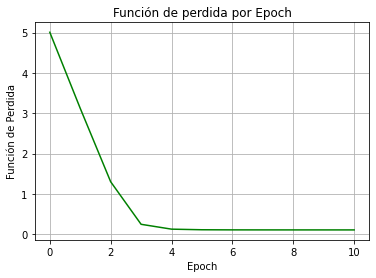

In [6]:
fig, ax =  plt.subplots(figsize=(6, 4))
ax.plot([index for index, value in enumerate(funcion_perdida)], [error for error in funcion_perdida], color='green')
ax.set_title("Función de perdida por Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Función de Perdida")
ax.grid(True)
plt.show()

## - Acierto | Error del modelo generado


* El Dataset con el que estamos trabajando tiene 100 elementos y podemos ver (aplicando el modelo obtenido por la regresión logística) como de bien o de mal clasifica estas flores:


* Mostramos a continuación para cada elemento del Dataset, cual es su predicción y si acierta o falla el tipo de flor:

In [7]:
error = 0
for index, elem in enumerate(X):
    ecuation = sum(i * j for i, j in zip(betas, elem)) + beta_0
    hipotesis = round(1 / (1 + math.exp(-1 * ecuation)))
    error += abs(hipotesis - y[index])
    
    # Imprimimos por pantalla la información de cada elemento
    print('\nElemento {}'.format(index + 1))
    print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
          format(beta_0, betas[0], X[index][0], betas[1], X[index][0], ecuation))
    print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(ecuation, 1 / (1 + math.exp(-1 * ecuation))))
    print('Y_real = {} - Y_predic = {} - Acieto = {}'.format(y[index], hipotesis, y[index]==hipotesis))
    
error = error / len(X)
    
print('\nAcierto = {} %'.format((1-error) * 100))
print('Error = {} %'.format(error * 100))


Elemento 1
  Z =  -0.98 + 2.90·5.10 + -4.77·5.10 = -2.86
  g(Z) =  1 / 1 + e^-(-2.86) = 0.05
Y_real = 0 - Y_predic = 0 - Acieto = True

Elemento 2
  Z =  -0.98 + 2.90·4.90 + -4.77·4.90 = -1.06
  g(Z) =  1 / 1 + e^-(-1.06) = 0.26
Y_real = 0 - Y_predic = 0 - Acieto = True

Elemento 3
  Z =  -0.98 + 2.90·4.70 + -4.77·4.70 = -2.60
  g(Z) =  1 / 1 + e^-(-2.60) = 0.07
Y_real = 0 - Y_predic = 0 - Acieto = True

Elemento 4
  Z =  -0.98 + 2.90·4.60 + -4.77·4.60 = -2.41
  g(Z) =  1 / 1 + e^-(-2.41) = 0.08
Y_real = 0 - Y_predic = 0 - Acieto = True

Elemento 5
  Z =  -0.98 + 2.90·5.00 + -4.77·5.00 = -3.63
  g(Z) =  1 / 1 + e^-(-3.63) = 0.03
Y_real = 0 - Y_predic = 0 - Acieto = True

Elemento 6
  Z =  -0.98 + 2.90·5.40 + -4.77·5.40 = -3.90
  g(Z) =  1 / 1 + e^-(-3.90) = 0.02
Y_real = 0 - Y_predic = 0 - Acieto = True

Elemento 7
  Z =  -0.98 + 2.90·4.60 + -4.77·4.60 = -3.84
  g(Z) =  1 / 1 + e^-(-3.84) = 0.02
Y_real = 0 - Y_predic = 0 - Acieto = True

Elemento 8
  Z =  -0.98 + 2.90·5.00 + -4.77·5.0

<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">